TRAINING

menggunakan dataset iris sampai mendapatkan hasil akurasi
library yang digunakan pandas, numpy, matplotlib, seaborn, tensorflow

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics

DATA INGESTION

Membaca data yang akan digunakan dalam pembuatan model

In [29]:
dataset = pd.read_csv('D:\IRVAN\code\python\model\iris-train\iris.csv')

DATA EXPLORATION

Tahap untuk mengeksplorasi data, untuk mengetahui karakteristik dari suatu dataset

In [30]:
print(dataset.info())
print(dataset.keys())
print(dataset.shape)
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
(150, 5)


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64


<AxesSubplot:ylabel='Frequency'>

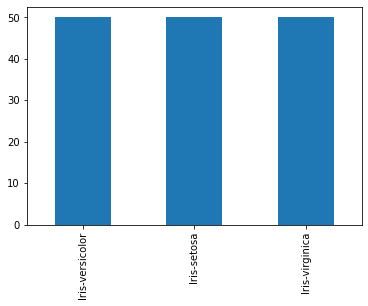

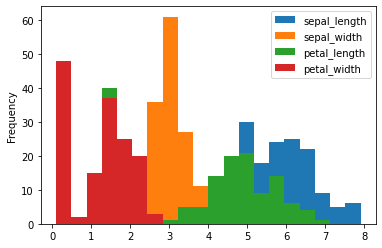

In [31]:
counts = dataset["species"].value_counts()
print(counts)
counts.plot(kind="bar")
dataset.plot.hist(bins=20)

<AxesSubplot:>

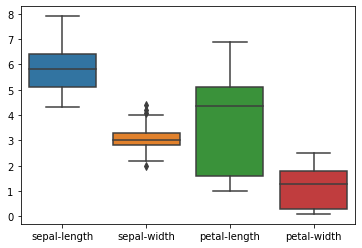

In [4]:
sns.boxplot(data=dataset)

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

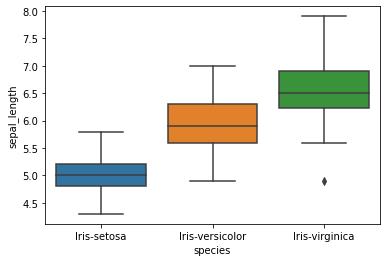

In [32]:
sns.boxplot(data=dataset, x="species", y="sepal_length")

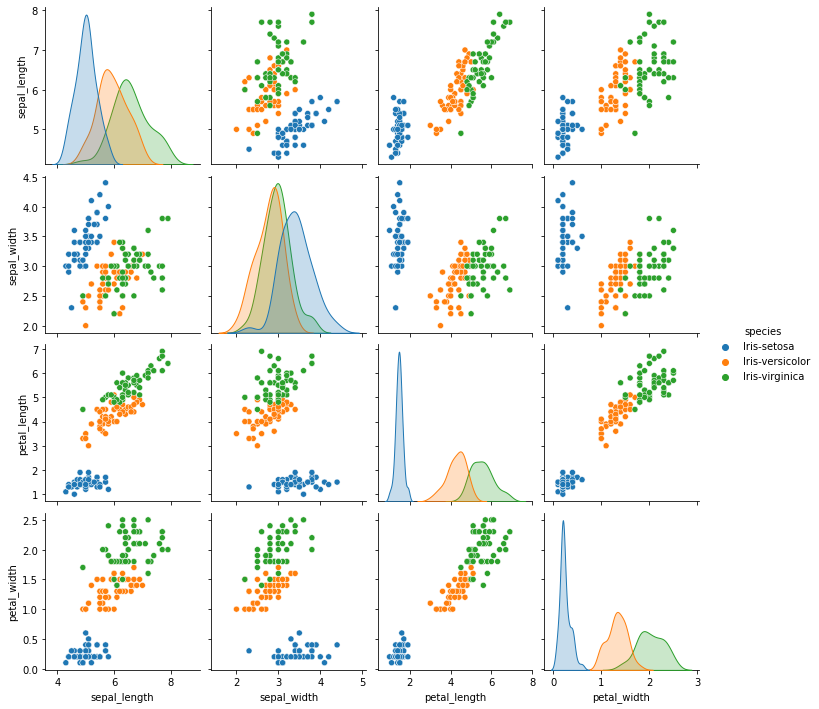

In [33]:
sns.pairplot(data=dataset, hue="species")

PRE-PROCESSING DATA

Pengolahan data sebelum dapat digunakan untuk membuat model 

In [57]:
x = dataset.iloc[:, 0:-1]
y = dataset.iloc[:, 4]

test_size = 0.2

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=test_size, random_state=42, stratify=y)
print("banyaknya data train = ", len(x_train))
print("banyaknya data test = ", len(x_test))

banyaknya data train =  120
banyaknya data test =  30


In [58]:
#label encoding
print("dimensi data awal = ", y_test.shape)
lb = preprocessing.LabelEncoder()
lb.fit(y_train)

y_train = lb.transform(y_train)
y_test = lb.transform(y_test)
print("dimensi data label encode = ", y_test.shape)

#one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
print("dimensi data one-hot encoding = ", y_test.shape)

dimensi data awal =  (30,)
dimensi data label encode =  (30,)
dimensi data one-hot encoding =  (30, 3)


DATA TRAINING

Merupakan proses pembuatan model neural network yang nantinya akan dilatih dan digunakan untuk melakukan prediksi

In [59]:
#pembuatan arsitektur model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

In [60]:
#kompilasi model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


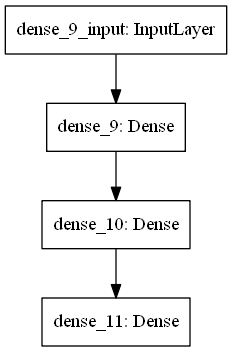

In [61]:
#pembuatan diagram model
tf.keras.utils.plot_model(model)

In [62]:
#training model

epochs = 100#param {type:"number"}
batch_size = 20#param {type="number"}

H = model.fit(x_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size)

Train on 96 samples, validate on 24 samples
Epoch 1/100
96/96 [==============================] - 1s 9ms/sample - loss: 1.3799 - accuracy: 0.3229 - val_loss: 1.5419 - val_accuracy: 0.2500
Epoch 2/100
96/96 [==============================] - 0s 333us/sample - loss: 1.2863 - accuracy: 0.3750 - val_loss: 1.4420 - val_accuracy: 0.3333
Epoch 3/100
96/96 [==============================] - 0s 439us/sample - loss: 1.2002 - accuracy: 0.5000 - val_loss: 1.3500 - val_accuracy: 0.5000
Epoch 4/100
96/96 [==============================] - 0s 400us/sample - loss: 1.1270 - accuracy: 0.6562 - val_loss: 1.2714 - val_accuracy: 0.5833
Epoch 5/100
96/96 [==============================] - 0s 364us/sample - loss: 1.0662 - accuracy: 0.6667 - val_loss: 1.2039 - val_accuracy: 0.5833
Epoch 6/100
96/96 [==============================] - 0s 354us/sample - loss: 1.0177 - accuracy: 0.6875 - val_loss: 1.1476 - val_accuracy: 0.5833
Epoch 7/100
96/96 [==============================] - 0s 385us/sample - loss: 0.9816 - ac

EVALUATION

Pada tahap ini akan dilakukan interpretasi model yang sudah dibuat, apakah sudah cukup bagus atau belum.

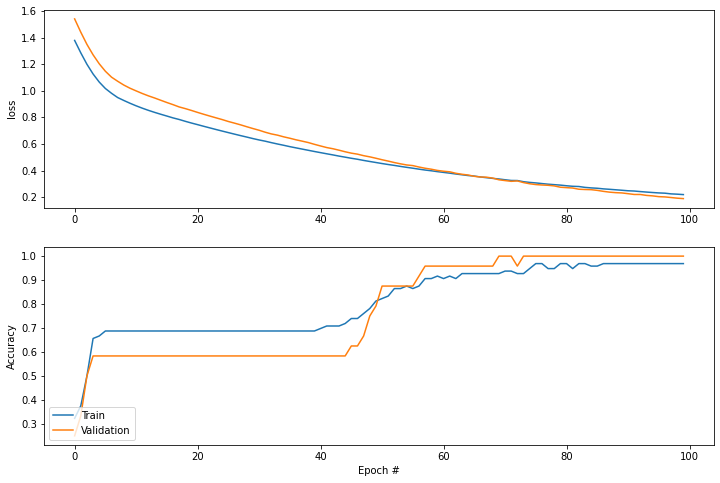

In [63]:
plt.figure(figsize=(12,8))

ax1 = plt.subplot(2, 1, 1)
plt.plot(np.arange(0, epochs), H.history["loss"], label="Train")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="Validation")
ax1.set_ylabel("loss")

ax2 = plt.subplot(2, 1, 2, sharex = ax1)
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="Train")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="Validation")
ax2.set_xlabel("Epoch #")
ax2.set_ylabel("Accuracy")
ax2.legend(loc="lower left")

plt.show()

In [64]:
#melakukan prediksi dengan data uji
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

In [65]:
print(metrics.classification_report(y_test, y_pred, target_names=lb.classes_))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [67]:
#prediksi data baru
sepal_length = 4
sepal_width = 2
petal_length = 3
petal_width =2

pred = model.predict([[sepal_length, sepal_width, petal_length, petal_width]])
predicted_species = lb.inverse_transform(np.argmax(pred, axis=1))

print("Probabilities = ", pred)
print("Prediction = ", predicted_species)

Probabilities =  [[0.02981021 0.50286925 0.4673205 ]]
Prediction =  ['Iris-versicolor']
